## Data and labels 
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [21]:
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 600   D= 3


## Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

In [22]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)

569.5269005085432
mean minimum distance between points:  23.321029500210262


## t-SNE visualization, for true labels

In [23]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
for i in range (4)
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=1, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

SyntaxError: invalid syntax (1468647047.py, line 15)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time

# Set random seed
np.random.seed(0)

# Generate data
N = 1000
data = np.random.randn(N, 50)
y = np.random.randint(0, 3, size=N)

# Define parameters
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

# Create subplots
(fig, subplots) = plt.subplots(2, Np , figsize=(3*Np, 5.4))

# Loop through different perplexities
for j, rs in enumerate(range(2)):
    X_all = [None]
    for i, perplexity in enumerate(perplexities):
        ax = subplots[j][i]

        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=rs, perplexity=perplexity)
        Y = tsne.fit_transform(data)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
        ax.tick_params(left=False,bottom=False)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')
        X_all.append(Y)

plt.show()


## DBSCAN: find labels by applying clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together and separated from other dense regions of points. The algorithm takes two input parameters: "eps" and "minPts".

eps (epsilon) is the radius of the neighborhood around a point. It defines the maximum distance between two points for them to be considered as part of the same cluster. Points within this radius are considered "neighbors" of each other.

minPts (minimum number of points) is the minimum number of points needed to form a dense region (i.e., a cluster). If there are fewer than minPts points within the eps radius of a point, that point is labeled as noise and not considered part of any cluster.

To refine the grid with more values of "eps" and "minPts", we can increase the number of values in the range of values used for each parameter. This will result in a larger heat-map showing more combinations of "eps" and "minPts" values and their corresponding NMI values.

There may be a correlation between "eps" and "minPts" in providing a high NMI, as both parameters influence the clustering results. In general, increasing "eps" allows for more points to be considered part of the same cluster, while increasing "minPts" requires a higher density of points for a cluster to form. The optimal combination of "eps" and "minPts" values will depend on the specific dataset and the desired clustering result.

To further tune "eps" and "minPts", we can plot ranked distances and visually inspect the plot to identify a suitable value for "eps"

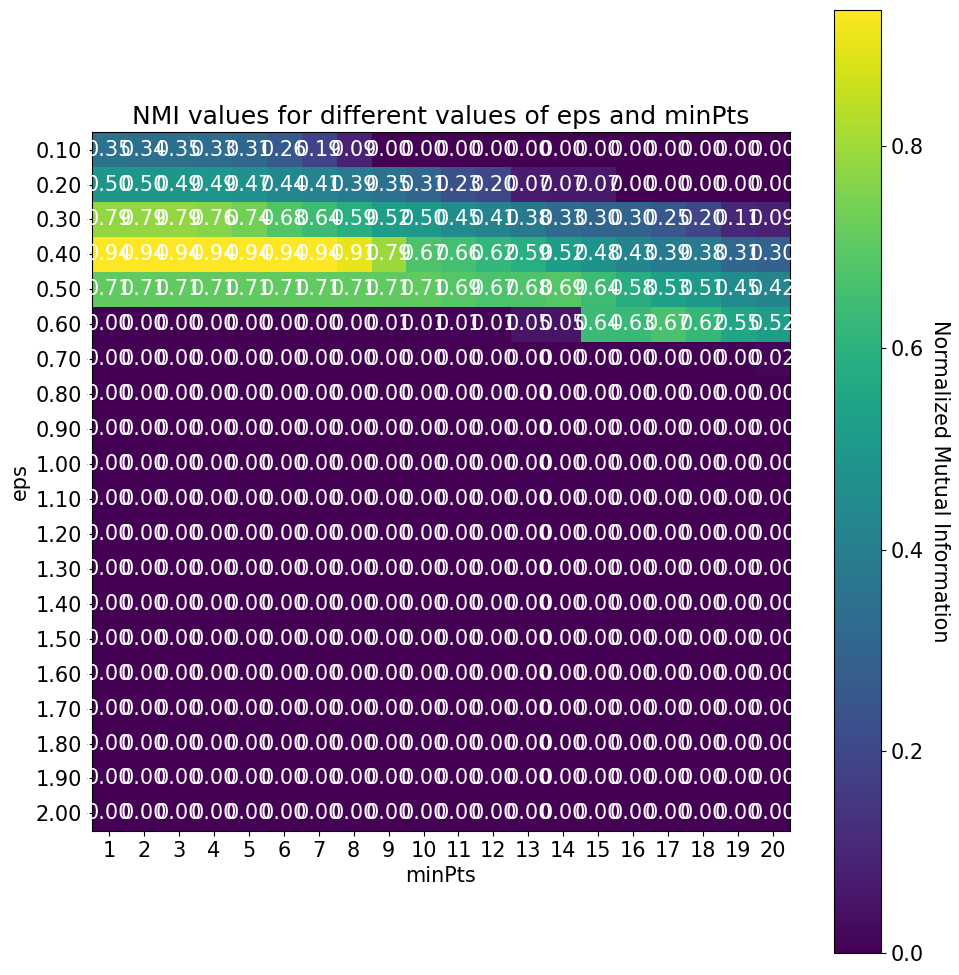

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import OrderedDict

# Load data
data = np.loadtxt("DATA/x_3d.dat", delimiter='\t')
y_true = np.loadtxt("DATA/y_3d.dat", dtype=int)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Define range of values for eps and minPts
eps_range = np.linspace(0.1, 2.0, 20)
minPts_range = np.arange(1, 21)

# Create an empty array to store the NMI values
NMI_array = np.zeros((len(eps_range), len(minPts_range)))

# Loop over the range of values for eps and minPts
for i, eps in enumerate(eps_range):
    for j, minPts in enumerate(minPts_range):
        # Fit DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        y_pred = dbscan.fit_predict(X)
        
        # Compute NMI and store in array
        NMI_array[i, j] = NMI(y_true, y_pred)

# Plot heat-map of NMI values
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(NMI_array, cmap='viridis')

# Add color-bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Normalized Mutual Information', rotation=-90, va="bottom")

# Add ticks and labels
ax.set_xticks(np.arange(len(minPts_range)))
ax.set_yticks(np.arange(len(eps_range)))
ax.set_xticklabels(minPts_range)
ax.set_yticklabels(['{:.2f}'.format(eps) for eps in eps_range])
ax.set_xlabel('minPts')
ax.set_ylabel('eps')

# Add text annotations
for i in range(len(eps_range)):
    for j in range(len(minPts_range)):
        ax.text(j, i, '{:.2f}'.format(NMI_array[i, j]), ha='center', va='center', color='w')

# Add title and show plot
ax.set_title('NMI values for different values of eps and minPts')
fig.tight_layout()
plt.show()


<bound method _AxesBase.set_yticklabels of <AxesSubplot:>>

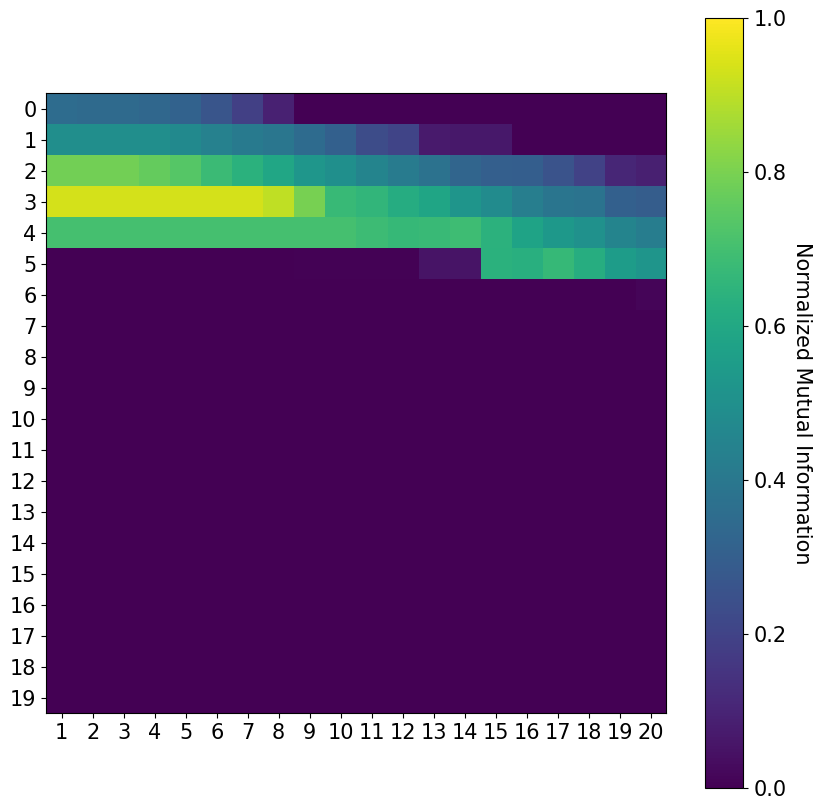

In [19]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import OrderedDict

# Load data
data = np.loadtxt("DATA/x_3d.dat", delimiter='\t')
y_true = np.loadtxt("DATA/y_3d.dat", dtype=int)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Define range of values for eps and minPts
eps_range = np.linspace(0.1, 2.0, 20)
minPts_range = np.arange(1, 21)

# Create an empty array to store the NMI values
NMI_array = np.zeros((len(eps_range), len(minPts_range)))

# Loop over the range of values for eps and minPts
for i, eps in enumerate(eps_range):
    for j, minPts in enumerate(minPts_range):
        # Fit DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        y_pred = dbscan.fit_predict(X)
        
        # Compute NMI and store in array
        NMI_array[i, j] = NMI(y_true, y_pred)

# Plot heat-map of NMI values
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(NMI_array, cmap='viridis', vmin=0.0, vmax=1.0)

# Add color-bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Normalized Mutual Information', rotation=-90, va="bottom")

# Add ticks and labels
ax.set_xticks(np.arange(len(minPts_range)))
ax.set_yticks(np.arange(len(eps_range)))
ax.set_xticklabels(['{}'.format(x) for x in minPts_range])
ax.set_yticklabels


N= 600   D= 3


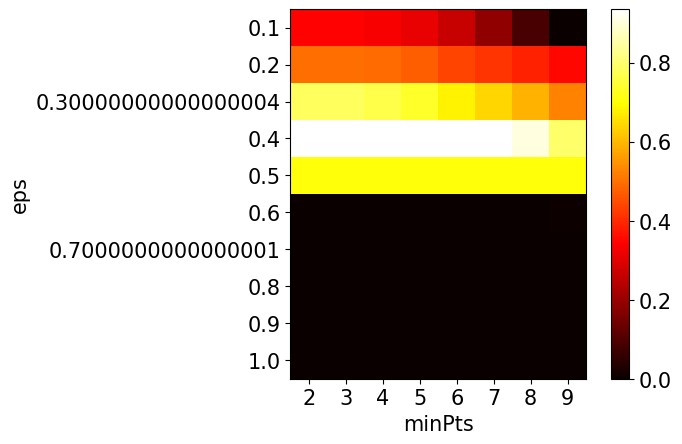

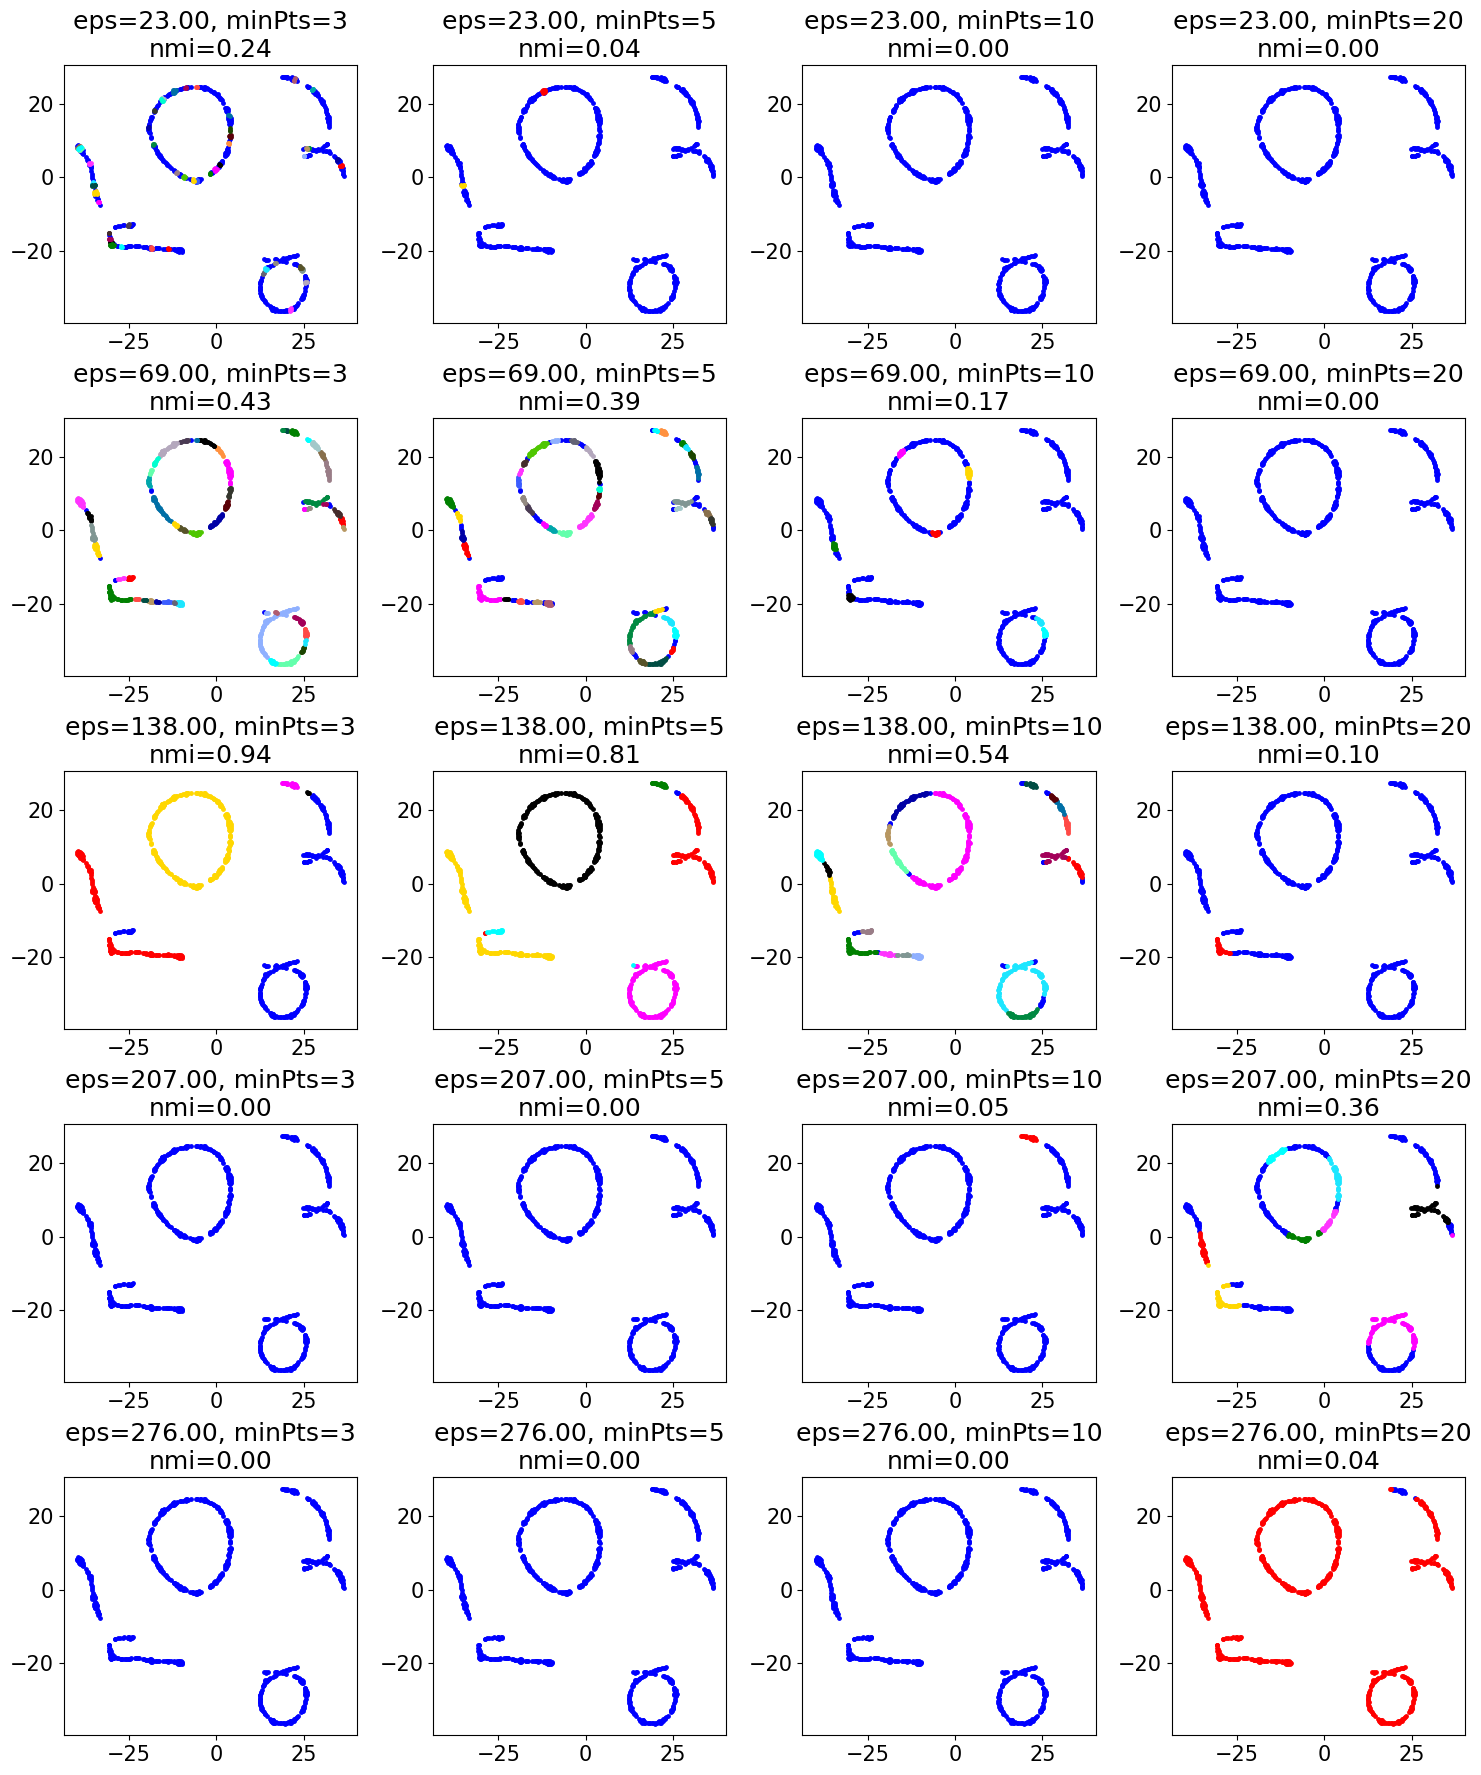